## Requirements: 
- https://github.com/mindee/doctr: I did a git clone; pip install was not working. Also install GTK (for windows; instructions in the repo). Mac should be able to install something similar.
- Pytorch
- pandas
- matplotlib

In [4]:
import sys
import os
sys.path.append("../doctr/")
from doctr.models import ocr_predictor
from doctr.io import DocumentFile

print("successfully imported what we needed")
#def main():
model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

#model = ocr_predictor(pretrained=True)
# PDF
doc = DocumentFile.from_pdf("C:/Users/islam/Desktop/shortcutpaths/CUAD_v1/CUAD_v1/full_contract_pdf/Part_II/Service/FEDERATEDGOVERNMENTINCOMESECURITIESINC_04_28_2020-EX-99.SERV AGREE-SERVICES AGREEMENT_AMENDMENT.pdf")
# Analyze
result = model(doc)
#print(dir(result))
#result.show(doc)
json_output = result.export()
print(json_output)

#if __name__ == '__main__':
#    main()

successfully imported what we needed
{'pages': [{'page_idx': 0, 'dimensions': (1684, 1190), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.3466796875, 0.052734375), (0.6572265625, 0.06640625)), 'lines': [{'geometry': ((0.3466796875, 0.052734375), (0.6572265625, 0.06640625)), 'words': [{'value': 'AMENDMENT', 'confidence': 0.9976744055747986, 'geometry': ((0.3466796875, 0.0546875), (0.4541015625, 0.0654296875))}, {'value': 'TO', 'confidence': 0.9998204112052917, 'geometry': ((0.4482421875, 0.0537109375), (0.4775390625, 0.0654296875))}, {'value': 'SERVICES', 'confidence': 0.9969653487205505, 'geometry': ((0.4765625, 0.052734375), (0.5556640625, 0.06640625))}, {'value': 'AGREEMENT', 'confidence': 0.9988123178482056, 'geometry': ((0.5546875, 0.052734375), (0.6572265625, 0.06640625))}]}], 'artefacts': []}, {'geometry': ((0.0830078125, 0.091796875), (0.9189453125, 0.134765625)), 'lines': [{'geometry': ((0.106445

In [24]:
[json_output['pages'][0]['blocks'][1]['lines'][0]['words'][i]['value'] for i in range(len(json_output['pages'][0]['blocks'][1]['lines'][0]['words']))]

['This',
 'AMENDMENT',
 'TO',
 'SERVICES',
 'AGREEMENT,',
 'dated',
 'and',
 'effective',
 'as',
 'of',
 'March',
 '30,',
 '2009',
 '(this',
 '"Amendment"),',
 'is',
 'made']

In [25]:
lines = json_output['pages'][0]['blocks'][1]['lines']
for line in lines:
    print([line['words'][i]['value'] for i in range(len(line['words']))])

['This', 'AMENDMENT', 'TO', 'SERVICES', 'AGREEMENT,', 'dated', 'and', 'effective', 'as', 'of', 'March', '30,', '2009', '(this', '"Amendment"),', 'is', 'made']
['between', 'FEDERATED', 'INVESTMENT', 'MANAGEMENT', 'COMPANY,', 'a', 'Delaware', 'statutory', 'trust', '(the', '"Adviser"),', 'and']
['FEDERATED', 'ADVISORY', 'SERVICES', 'COMPANY,', 'a', 'Delaware', 'statutory', 'trust', '("FASC").', 'Capitalized', 'terms', 'used,', 'but', 'not', 'defined,']


In [27]:
[json_output['pages'][0]['blocks'][i]['geometry'] for i in range(len(json_output['pages'][0]['blocks']))]

[((0.3466796875, 0.052734375), (0.6572265625, 0.06640625)),
 ((0.0830078125, 0.091796875), (0.9189453125, 0.134765625)),
 ((0.08203125, 0.1318359375), (0.7421875, 0.1484375)),
 ((0.4619140625, 0.1591796875), (0.5380859375, 0.169921875)),
 ((0.08203125, 0.1826171875), (0.91796875, 0.3193359375)),
 ((0.08203125, 0.31640625), (0.197265625, 0.3310546875)),
 ((0.107421875, 0.3427734375), (0.65625, 0.3583984375)),
 ((0.0810546875, 0.3681640625), (0.921875, 0.6357421875)),
 ((0.08203125, 0.39453125), (0.4794921875, 0.41015625)),
 ((0.158203125, 0.48828125), (0.4140625, 0.50390625)),
 ((0.0830078125, 0.59375), (0.541015625, 0.6103515625)),
 ((0.0810546875, 0.6328125), (0.28125, 0.6962890625)),
 ((0.3994140625, 0.6591796875), (0.7392578125, 0.6728515625)),
 ((0.08203125, 0.708984375), (0.4189453125, 0.75)),
 ((0.08203125, 0.7607421875), (0.2763671875, 0.775390625))]

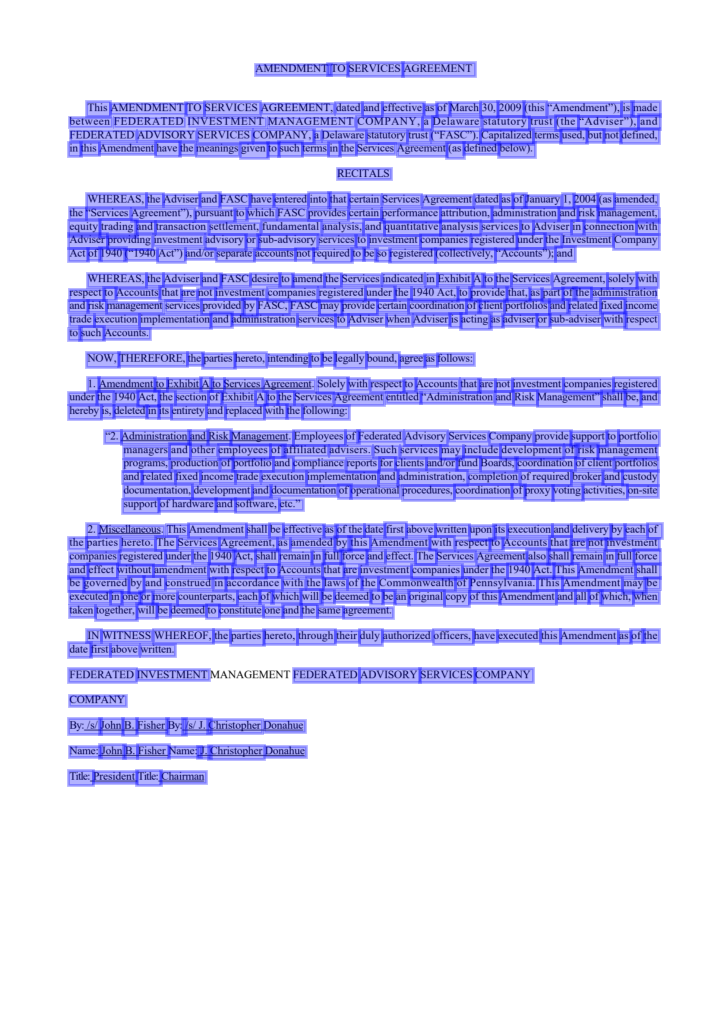

In [30]:
result.show(doc)

## Obtaining bounding boxes for each page in a file

In [33]:
import pandas as pd

In [94]:
import sys
import os
sys.path.append("../doctr/")
from doctr.models import ocr_predictor
from doctr.io import DocumentFile

xpath = "C:/Users/islam/Desktop/shortcutpaths/CUAD_v1/CUAD_v1/full_contract_pdf/Part_II/Development/BIOAMBERINC_04_10_2013-EX-10.34-DEVELOPMENT AGREEMENT - First Amendment.pdf"

def create_csv_for_file(pdfPath):
    docId = pdfPath.split("/")[-1][:-4]
    model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

    doc = DocumentFile.from_pdf(pdfPath)

    result = model(doc)

    jsonOutput = result.export()
    
    output = {'page':[], "docId":[], "bbId":[], "xmin":[], "ymin":[], "xmax":[], "ymax":[], "text":[]}
    
    
    
    for pageId, page in enumerate(jsonOutput['pages']):  
        for blockId, block in enumerate(page['blocks']):
            ((xmin, ymin),(xmax, ymax)) = block['geometry']
            
            fullText = []
            
            for line in block['lines']:
                words = [line['words'][i]['value'] for i in range(len(line['words']))]
                words.append("\n")
                fullText.extend([" ".join(words)])
            #print("".join(fullText))
            #print("next block\n")
            output['page'].append(pageId)
            output['docId'].append(docId)
            output['bbId'].append(blockId)
            output['xmin'].append(xmin)
            output['ymin'].append(ymin)
            output['xmax'].append(xmax)
            output['ymax'].append(ymax)
            output['text'].append("".join(fullText))
    
    pd.DataFrame(output).to_csv(f"boundingboxtest/20220925_doctr_initial_csvs/{docId}.csv")
    print(f"Wrote {docId} to csv")
    return None

### getting all paths

In [69]:
parentPath = "C:/Users/islam/Desktop/shortcutpaths/CUAD_v1/CUAD_v1/full_contract_pdf"
allFiles = [os.path.join(path, name) for path, subdirs, files in os.walk(parentPath) for name in files]

In [78]:
allFiles = [fpath.replace("\\", "/") for fpath in allFiles]

In [87]:
allFiles

['C:/Users/islam/Desktop/shortcutpaths/CUAD_v1/CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/CreditcardscomInc_20070810_S-1_EX-10.33_362297_EX-10.33_Affiliate Agreement.pdf',
 'C:/Users/islam/Desktop/shortcutpaths/CUAD_v1/CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605784_EX-10.27_Affiliate Agreement.pdf',
 'C:/Users/islam/Desktop/shortcutpaths/CUAD_v1/CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/DigitalCinemaDestinationsCorp_20111220_S-1_EX-10.10_7346719_EX-10.10_Affiliate Agreement.pdf',
 'C:/Users/islam/Desktop/shortcutpaths/CUAD_v1/CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/LinkPlusCorp_20050802_8-K_EX-10_3240252_EX-10_Affiliate Agreement.pdf',
 'C:/Users/islam/Desktop/shortcutpaths/CUAD_v1/CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/SouthernStarEnergyInc_20051202_SB-2A_EX-9_801890_EX-9_Affiliate Agreement.pdf',
 'C:/Users/islam/Desktop/shortcutpaths/CUAD_v1/CUAD_v1/full_contract_pdf/Part_I/A

In [96]:
for filePath in allFiles:
    create_csv_for_file(filePath)

Exhibit 10.33 

next block

Last Updated: April6,2007 
CHASE. AFFILIATE AGREEMENT 

next block

THIS AGREEMENT sets forth the terms and conditions agreed to between Chase Bank USA, N.A. (?Chase?) and you as an "Affiliate" in the Chase 
Affiliate Program (the "Affiliate Program" "). Once accepted into the Affiliate Program, an Affiliate can establish links from the Affiliate's Website to 
[Chase.com). Chase will pay Affiliate a fee for each approved credit card account that originates from a link in Affiliate' s Website. 
THIS IS Al LEGAL AND CONTRACTUALLY BINDING. AGREEMENT BETWEEN. AFFILIATE. AND CHASE. TO. APPLY TO THE. AFFILIATE 
PROGRAM, YOUMUST COMPLETE. AND SUBMIT THE. AFFILIATE REGISTRATION: FORM. AND CLICK ON THE AGREE" BUTTON BELOW 
TO INDICATE YOUR WILLINGNESS TOBE BOUND' TOCHASE: BY THIS AGREEMENT. THIS AGREEMENT WILL TAKE EFFECTIFAND 
WHEN CHASE REVIEWS AND. ACCEPTS YOUR REGISTRATION: FORM. AND PROVIDES YOU NOTICE OF ACCEPTANCE. BY SUBMITTING 
YOUR REGISTRATION FORM, AFFILI

Exhibit 10.27 

next block

MARKETING AFFILIATE AGREEMENT 

next block

Between: 

next block

Birch First Global Investments Inc. 

next block

And 

next block

Mount Knowledge Holdings Inc. 

next block

Dated: May 8, 2014 

next block

Source: CYBERGY HOLDINGS, INC., 10-Q, 5/20/2014 

next block

This Marketing Affiliate Agreement (the Agreement") is entered into this gth day of May 
2014, by and between BIRCH! FIRST GLOBAL INVESTMENTS INC., a corporation incorporated 
in the U.S. Virgin Islands, with its main place of business located 9100 Havensight, Port ofs Sale, Ste. 
15/16, St. Thomas, VI 0080 (referred to as "Company") and MOUNT KNOWLEDGE HOLDINGS 
INC. and/or assigns, a corporation incorporated in the State ofNevada, with its main place ofbusiness 
located at 228 Park Avenue S. #56101 New York, NY 10003-1502 (referred to as "Marketing 
WHEREAS, this Agreement is to set forth in a formal agreement the prior verbal understandings 
between the parties in place since December 3

AFFILIATE. AGREEMENT 

next block

THIS NETWORK AFFILIATE AGREEMENT (this "Agreement") )is made as oft this 14th day of March, 2011 by and between National CineMedia, 
LLC, al Delaware limited liability company ("NCM"), and Digital Cinema Destinations Corp., a Delaware corporation ("Network Affiliate" and with 

next block

NCM, each a "Party" and collectively, the Parties" 

next block

BACKGROUND 

next block

WHEREAS, NCM operates a "Digital Content Network" of proprietary and third-party hardware and software pursuant to which the 
Service may be digitally transmitted to equipment and facilities installed in, and displayed on movie screens, video display terminals and similar 
WHEREAS, Network. Affiliate owns and operates a theatre circuit with a patron base in excess of 400,000 patrons; and 
WHEREAS, both Network Affiliate and NCM want to expand NCM's advertising "footprint" in the markets served by Network Affiliate; 
WHEREAS, NCM and Network Affiliate want to enter into a strate

EXHIBIT 10.1 

next block

AFFLIATE AGREEMENT DATED JULY 15, 2005 

next block

AFFILIATE AGREEMENT 

next block

This Agreement entered into as of the Effective Date by and between 
WHEREAS, Axiometric has developed certain computer software including 
wireless mesh networking technology and AMR devices and systems; 
WHEREAS, LKPL has developed certain radio devices and systems along 
with hardware manufacturing capacities and plans to develop AMR devices and 
WHEREAS, LKPL and Axiometric believe it will be in their mutual best 
interests to cooperate in further developing AMR product suites by creating a 
WHEREAS, LKPL and Axiometric entered into a Letter of Intent dated May 
3, 2005, and now desire to further describe their relationship as initially set 
NOW, THEREFORE, in consideration of the mutual promises contained 
herein, the fees to be paid in connection therewith, and other good and valuable 
consideration, the sufficiency of which is hereby acknowledged, the parties 

next 

Exhibit 10.8 

next block

Affiliate Program / Premium Affiliate Management General 
The following General Terms and Conditions are intended for (i) Web site 
(hereafter, "Affiliates") who wish to participate as Affiliates in 
the Affiliate Program provided by element 5 (governed by II. and IV. in 
these General Terms and Conditions) on the basis of these General Terms and 
Conditions and also for (ii) Software Publishers who distribute their 
software products as downloads using the services of element 5 GmbH, 
Vogelsanger Strasse 78, 50823 Cologne, Germany and its subsidiaries 
(together hereafter, "element 5") and who wish to make use of the 
additional service provided by element 5 (hereafter, "Affiliate 
Management", governed under III. and IV. in these General Terms and 
Conditions) for integration of the Affiliate Program provided by element 5. 
I. Object of the Affiliate Program/ Affiliate Management Program for 
The object of the Affiliate Program provided by element 5 (hereaf

Exhibit 10.16 

next block

EQUIDATA 
MARKETINGAFTLATE AGREEMENT 

next block

This Agreement is made this Ist day of October 2008, (the "Effective Date"), by and between Equidata, Inc., a corporation 
organized under the laws of Virginia with its principal place of business at 724 Thimble Shoals Boulevard Newport News, Virginia 
23606 ("Equidata"), and National Credit Report.com, LLCa Corporation organized under the laws of Florida, with its principal 
1. Equidata provides certain personal credit, fraud detection, credit scoring services and credit monitoring for consumers, the 
2. Marketing Affiliate and Equidata wish to enter into an agreement under which Marketing Affiliate may market the Services. 
3. Marketing Affiliate wishes to market the Services indirectly through third party programs, direct mail, Internet and both 
inbound and outbound telemarketing. In addition, each may own and operate a web site utilizing direct access to the 
Therefore, if accepted all parties agree tha

Execution Copy 

next block

CHARTER AFFILIATE. AFFILIATION. AGREEMENT 

next block

THIS AGREEMENT (the "Agreement"), made as of the 6th day ofl March, 2006 (the "Effective Date"), is by and between The 

next block

TUBE Music Network, Inc., a Florida corporation (the "Network"), and Tribune Broadcasting Company, al Delaware corporation ("Afliliate"), 
regarding the television programming service currently known as "The TUBE" (the "Service"). The parties hereby mutually agree as follows: 

next block

1. DEFINITIONS: 
Agreement: 

next block

In addition to any other defined terms in this Agreement, the following terms shall have the following meanings when used in thi 
"Acquired Station" means any Broadcast Television station that is acquired by Affiliate after the Effective Date. 
"Affiliate Launch Date" means the date on which the Service is initially transmitted by the first of Affiliate' s Stations. 

next block

"Affiliate Advertising Share" has the meaning set forth in Exhibit

10.1 

next block

AFFILIATE 

next block

This Business Affiliate Agreement ("Agreement") dated January 28, 2005, 
as of October 15, 2004, ("Effective Date") is entered into by and 
between Dr. George D. Green (the "Business Affiliate") and UNION DENTAL CORP., a 
Florida corporation ("UDC") (collectively, Business Affiliate and UDC may be 
the Business Affilia ate wishes to help further UDC's mission of 
consideration, the receipt and sufficiency of is hereby 
A Confidential Informatione shall mean any and all 
that a Party may reasonably expect to remain confidential and not 
2. Services. It is anticipated that the Business Affiliate will provide 
services both for clients of the Business Affiliate and UDC that involve the use 
Information necessary to perform the Services. Additionally, the Parties may 
only (a) to its employees, subcontractors and agents, in accordance with this 
Agreement, or (b) as directed by the other Party. The Parties expressly agree 
that any and all or disc

EXHIBIT 10.11 

next block

1 FINANCIAL CORPORATION 
AFFILIATE OFFICE AGREEMENT 

next block

THIS AGREEMENT is entered into by and between NETWORK 1 FINANCIAL, INC. 
("NETWORK 1"), a Virginia Corporation with its principal place of business at 
1501 Farm Credit Drive, Suite 1500, McLean, Virginia 22102-5004, and Payment 
Data Systems, Inc., the Affiliate Office ("AFFILIATE"), a Nevada Corporation 
with its principal place of business at 12500 San Pedro Suite 120 San Antonio, 
TX 78216. NETWORK 1 and Affiliate hereby agree as follows: 
WHEREAS, Network 1 Financial, Inc. ("Network 1") provides through various Member 
Bank(s) ("Member"), VISA and MasterCard processing and related payment 
processing services ("Services") to merchant (s) ("Merchant (s)") in accordance 
with the terms of certain Agreement (s) between Network 1, Member and other 
WHEREAS, the Network 1 desires to locate individuals to market Services as 
WHEREAS, Affiliate desires to establish an "Affiliate Office" on behal

CO-BRANDING AND ADVERTISING AGREEMENT 

next block

THIS CO-BRANDING AND ADVERTISING AGREEMENT (the "Agreement") is made 
asof June 21, 1999 (the "Effective Date") by and between I-ESCROW, 
INC., with its principal place of business at 1730 s. Amphlett 
Blvd., Suite 233, San Mateo, California 94402 ("i-Escrow"), and 
2THEMART.COM, INC. having its principal place of business at 18301 
Von Karman Avenue, 7th Floor, Irvine, California 92612 ("2TheMart"). 
(a) "CONTENT" means all content or information, in any medium, 
provided by a party to the other party for use in conjunction 
with the performance of its obligations hereunder, including 
without limitation any text, music, sound, photographs, video, 
graphics, data or software. Content provided by 2TheMart 
is referred to herein as "2TheMart Content" and Content 
provided by i-Escrow is referred to herein as "i-Escrow Content." 
(b) "CO-BRANDED SITE" means the web-site accessible through 
Domain Name, for the Services implemented by i-

Execution Copy 

next block

CO-BRANDING AND SERVICES AGREEMENT 

next block

Co-Branding and Services Agreement, effective as of October 1, 1999 
(this "Agreement"), between RSL COM PrimeCall, Inc., a Delaware corporation 
("PrimeCall"), and deltathree.com, Inc. (formerly known as Delta Three, Inc.), a 

next block

corporation ("DeltaThree"). 
WHEREAS, 
calling cards; 
to provide 

next block

ITNESSETH 
is a leading provider and 
products and services; 

next block

of prepaid 

next block

WHEREAS, DeltaThree is a leading on-line provider of Internet Protocol 
(IP) communications services and utilizes the Internet and networks based on IP 
WHEREAS, each of PrimeCall and 
DeltaThree prepaid IP telephony calling card (the "Calling Card"); 
calling products on-line utilizing the Internet; 

next block

to 

next block

a 

next block

WHEREAS, PrimeCall desires to begin selling and advertising its prepaid 
WHEREAS, PrimeCall has agreed to provide to DeltaThree certain services 
in con

EXHIBIT 10.3 

next block

[ABOUT LOGO] 
cO- BRANDING AGREEMI 
Schaumberg, IL 60173 
WITNESSET H: 
"About 

next block

This Agreement (the "Agreement"), dated this 19th day of January, 2001 (the 
"Effective Date"), is by and between About.com, Inc. ("About"), a 
corporation, located at 1440 Broadway, 19th Floor, New York, NY 10018 and 
ebix.com, Inc. ("ebix"), a Delaware corporation, located at 1900 E.Golf Road, 
WHEREAS, About owns and operates an Internet service known as About.com, 
currently located at the URL HTTP://www. .ABOUT. COM, at which users may access a 
variety of content channels and a network of highly-targeted, topic-specific Web 
sites, and includes any site owned, operated or under the control of About (the 
ebix is the e-commerce portal for insurance on the Internet offering to 
consumers and insurance professionals a one-stop site, currently located at 
AEsP://ww.ebix.com for all kinds of insurance content ranging from consumer to 
WHEREAS, the parties desire to c

EXHIBIT 10.4 

next block

THIS CO-BRANDING AGREEMENT (the "Agreement") is made as of May 22, 2000 
(the "Effective Date"), by and between WOMEN. COM NETWORKS, INC., a Delaware 
corporation having a place of business at 1820 Gateway Drive Suite 150, San 
Mateo, CA 94404 ("Women.com"), and EDIETS.COM, INC., a Delaware corporation, 
eDiets maintains a site on the Internet, currently located at 
httpi//ww.epiets.com (the "eDiets Site"), that provides personalized diet and 
WHEREAS, Women.com maintains sites on the Internet, currently located 
at AEtP:/ww.xomn.con (the "Women.com Sites"), that provides an on-line portal 
for women, blending content, community, commerce and services; 
eDiets and Women. com wish to establish and maintain a custom, 
category-exclusive, co-branded center containing repackaged content from the 
eDiets Site, including a free personal diet profile, which will be a part of the 
Women. com Sites, in order to promote the eDiets brand and drive traffic to the 
NOW TH

Exhibit 10.10 
RESPECT 

next block

CERTAIN INFORMATION IN THIS EXHIBIT HAS BEEN OMITTED AND FILED SEPARATELY 

next block

WITH THE COMMISSION. 
TO THE OMITTED PORTIONS. 

next block

HAS BEEN REQUESTED 
AGREEMENT 

next block

This Co-Branding Agreement (this "Agreement"), dated as of June 8, 1999, 
is made by and between Snap Technologies, Inc. a California corporation having 
its principal place of business at 111 Townsend St., San Francisco, CA 94107 
("Snap"), and, United Airlines, Inc., a Delaware corporation having its 
principal place of business at 1200 E. Algonquin Road, Elk Grove Township, IL 

next block

60007 ("Sponsor"). 

next block

RECITALS 

next block

A. Snap provides 

next block

to applications and other information and 

next block

content regarding selecting and applying to and attending colleges and graduate 
and professional degree programs to end users via the World Wide Web; and 
B. Sponsor wishes to obtain sponsorship placement on Snap's web site 
and 

EXHIBIT 10.27 

next block

MediaLinx File No. 952 

next block

CO-BRANDING CONTENT AGREEMENT 

next block

THIS AGREEMENT made as of the 30th day of June 1999 

next block

BETWEEN: 

next block

MEDIALINX INTERACTIVE, L.P., 
represented herein by its general partner 
MediaLinx Interactive Inc. 
acorporation incorporated under the laws 
of the Province of Ontario 
20 Richmond Street East 
Suite 600 
Toronto, Ontario 
M5C 3B5 

next block

(hereinafter called "MLX", or "Party") 
and 
EALTHCENTRAL.COM INC. 
a corporation incorporated under the 
laws of the state of California 
Marketplace Tower 
6001 Shellmound Street, Suite 800 
Emeryville, CA. 94608 
(hereinafter called "HÇI" or "Party") 

next block

(both MLX and HCI to be collectively referred to as the "Parties") 

next block

WHEREAS MLX owns, hosts, licenses, publishes and maintains an Internet service 
in Canada that includes, but is not limited to the "Sympatico" web site which 
includes inter alia, the HealthyWay web site on

Requested) 
10.11 
Road, Suite 100, 
Corporati ion, a 
of Online Communities 

next block

CO-BRANDING 

next block

This Co-Branding Agreement (this "Agreement") dated March 3, 2000 (the 
"Effective Date") is entered into between VerticalNet, Inc., a Pennsylvania 
corporation having a principal place of 
Pennsylvania, 19044 (VerticalNet"), and 
California Corporation, having a principal place of business at 1309 South Mary 
Avenue, Sunnyvale, California, 94087 ("Impresse"). 
VerticalNet owns and 
(defined below) that 
designed to be an online gathering place for businesses of a certain type or 
within a 
industry; and 
WHEREAS, 
(the "Impresse Services") to Users (defined below) of 
below); and 
(defined below) 
Services and to 
NOW, THEREFORE, in consideration of the mutual covenants herein, and 
intending to be legally bound hereby, 
1. DEFINITIONS 
1.1. AFFILIATE shall mean, when used with reference to a 
or entity directly or indirectly controlling, controlled by or under 
common 

EXHIBIT 10.17 

next block

AND 
"SONGS 4 
EXCLUDING CONFIDENTIAL 

next block

/1/ Indicates information 
confidential treatment. 

next block

has been redacted pursuant to a request for 

next block

2 

next block

INDEX TO THE 

next block

PAGE 
1 
3 
4 
4 
5 
3 

next block

SECTION 
1(c) 
3(a) 
4(c) 
4(d) 
5 

next block

LINE(S) 
3,4, and 5 
4,5, 10, 11, 12 and 13 
2,and 5 
2,3,4 and 5 
2 

next block

PRODUCT DEVELOPMENT AND CO-BRANDING AGREEMENT 
"SONGS 4 WORSHIP SERIES" 

next block

This Agreement, 
INTEGRITY INCORPORATED, a 

next block

into this the 10th day of January 2000, by and 
corporation with principal offices at 

next block

1000 Cody Road, Mobile, Alabama ("Integrity") and TIME LIFE, INC., a Delaware 
corporation d/b/a Time Life Music, with principal offices located at 2000 Duke 
Street, Alexandria, Virginia 22314 ("TL"). The parties wish to produce a series 
of recorded compilations and companion song books featuring praise and worship 
repertoires, which wil

*Confidential Treatment has been requested for portions of this agreement. 
The copy file herewith omits information subject to the confidentiality request. 
Omissions are designated as [*****]. A complete version of this agreement has 
been filed separately with the Securities and Exchange Commission. 

next block

Exhibit 10.2 

next block

E-CENTIVES - EXCITE@HOME CO-BRANDING 

next block

This agreement ("Agreement") is entered into as of the 16th day of February, 
2000 ("Effective Date"), by and between the At Home Corporation ("ExciteeHome" 
or "Excite"), located at 450 Broadway, Redwood City, California 94063, and 
e-centives, Inc., ("Application Provider" or "e-centives"), a Delaware 
corporation, located at 6903 Rockledge Drive, Suite 1200, Bethesda, MD 20817. 
A. Excite@Home provides the @Home Service, maintains sites on the Internet, 
including http://www. excite.com, and owns and/or manages or labels related 
Web sites worldwide (collectively, the "Excite Network") which, a

EXHIBIT 10.8 

next block

[Certain 
pursuant to a confidential treatment 
each place in this 
original.] 

next block

has been 

next block

from this Exhibit 10.8 
filed with the Securities and 

next block

Exchange Commission. The omitted information is indicated by the symbol "**" at 

next block

10.8 where the omitted informat ion appeared in the 

next block

This Co-Branding Agreement (this "Agreement") dated March 15, 2000 (the 
Horsham, Pennsylvania, 19044 VerticalNet"), and LeadersOnline, Inc. a Delaware 
Suite 500, Irvine, California, 92612 "(Leadersonline", (each a "Party" and 

next block

"Effective Date") is 
corporation having a 
corporation having a principal place of 
together the "Parties"). 
VerticalNet owns and operates series of Online Communities (as 
defined below) that are 
designed to be an online gathering place for 
a certain industry; and 
WHEREAS, Leadersonline desires to advertise its job placement services (the 
"LeadersOnline Services") on certain of

EXHIBIT 10.15 

next block

CO-BRANDING AGREEMENT 

next block

This Agreement is made this 21st day of January 2003 by and between Lucent 
Technologies Inc., a Delaware corporation having a principal place of business 
at 600 Mountain Avenue, Murray Hill, New Jersey 07974 ("Lucent") and mPhase 
Technologies Inc., a New Jersey corporation located at 587 Connecticut Avenue, 
Norwalk, Connecticut 068545 ("mPhase") (each individually, "a Party" and, 
WHEREAS, mPhase wishes to use the Lucent Technologies name and Logo and the 
slogan TECHNOLOGY BY LUCENT TECHNOLOGIES on printed circuit boards, product 
packaging and in printed marketing materials ("Approved Uses") in connection 
with its multi-access product (the "Goods") and Lucent wishes to permit mPhase 
NOW THEREFORE, the Parties, for good and valuable consideration, the receipt and 

next block

collectively, "the Parties"). 

next block

to do so. 
1. 
2. 

next block

sufficiency of which are hereby acknowledged, agree as follows: 


KeyboardInterrupt: 